In [11]:
from collections import Counter
from string import punctuation
from konlpy.tag import Okt 
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

### 기사 크롤링 

In [17]:
def crawling(soup) :
    # 기사에서 내용을 추출하고 반환 
    div = soup.find('div', class_="_article_body_contents")
    
    result = div.get_text().replace('\n', '').replace('// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}', '').replace('\t', '')
    
    return result
    

def get_href(soup) :
    result = []
    ul = soup.find('ul', class_= 'cluster_list')
    for div in ul.find_all('div', class_='cluster_text'):
        result.append(div.find('a')['href'])
    
    
    return result


def get_request(section, custom_header) :
    url = "https://news.naver.com/main/main.nhn"
    section_dict = { "정치" : 100,
                     "경제" : 101,
                     "사회" : 102,
                     "생활" : 103,
                     "세계" : 104,
                     "과학" : 105 }
    return requests.get(url, params={"sid1":section_dict[section]}, headers=custom_header)





def main() :
    custom_header = {'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'}
    list_href = []
    result = []
    
    # 섹션 입력 
    section = input('"정치", "경제", "사회", "생활", "세계", "과학" 중 하나를 입력하세요.\n  > ')
    
    req = get_request(section, custom_header)
    soup = BeautifulSoup(req.text, "html.parser")
    
    list_href = get_href(soup)
    
    for href in list_href :
        href_req = requests.get(href, headers=custom_header)
        href_soup = BeautifulSoup(href_req.text, "html.parser")
        result.append(crawling(href_soup))
    # print(result)
    text = " ".join(result)
    # return create_word_cloud(text)
    return text

### 단어 빈도수 계산

In [8]:
okt = Okt()

In [9]:
def count_word_freq(data):
    data_lower = data.lower()
    
    for p in punctuation :
        data_punc = data_lower.replace('p','')
        
    # 명사 추출
    data_nouns = okt.nouns(data_punc)
    
    counter = Counter(data_nouns)
    
    return counter

### 워드클라우드 생성

"정치", "경제", "사회", "생활", "세계", "과학" 중 하나를 입력하세요.
  > 과학


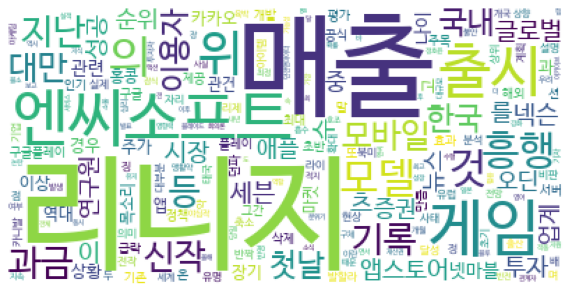

In [20]:
def create_word_cloud(data) :
    counter = count_word_freq(data)
    
    cloud = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white')
    cloud.fit_words(counter)
    cloud.to_file('cloud.png')
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

if __name__ == "__main__" :
    create_word_cloud(main())